In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()

# Combine the data into a single dataset
merged_results = pd.merge(mouse_drug_data, clinical_trial_data, on=["Mouse ID"])

# Display the data table for preview
merged_results.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_and_time_tumor_vol = merged_results.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
drug_and_time_tumor_vol = drug_and_time_tumor_vol.reset_index()
# Preview DataFrame
drug_and_time_tumor_vol

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_and_time_tumor_vol_stderr = merged_results.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
drug_and_time_tumor_vol_stderr = drug_and_time_tumor_vol_stderr.reset_index()
# Preview DataFrame
drug_and_time_tumor_vol_stderr.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
drug_and_time_tumor_vol = drug_and_time_tumor_vol.pivot(
    index='Timepoint',
    columns='Drug',
    values='Tumor Volume (mm3)')
# Preview that Reformatting worked
drug_and_time_tumor_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


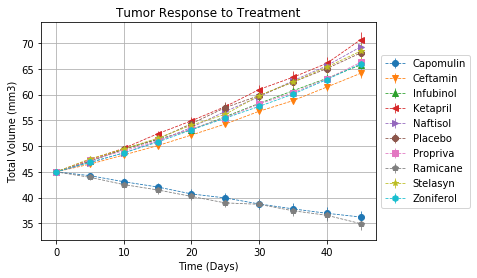

In [5]:
# Generate the Plot (with Error Bars)
xaxis = drug_and_time_tumor_vol.index
treatments = drug_and_time_tumor_vol.columns
stderr = drug_and_time_tumor_vol_stderr.pivot(
    index='Timepoint',
    columns='Drug',
    values='Tumor Volume (mm3)')
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

for i in range(len(treatments)):
    plt.errorbar(xaxis, drug_and_time_tumor_vol[treatments[i]], yerr=stderr[treatments[i]],
                linestyle='dashed', marker=filled_markers[i], linewidth=0.8)
plt.title("Tumor Response to Treatment")
plt.ylabel("Total Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Save the Figure
plt.savefig("tumor_response_over_time.png", bbox_inches='tight')
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_time_met_site = merged_results.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
drug_time_met_site = pd.DataFrame(drug_time_met_site)
# Preview DataFrame
drug_time_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_time_met_site_stderr = merged_results.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
drug_time_met_site_stderr = pd.DataFrame(drug_time_met_site_stderr)
# Preview DataFrame
drug_time_met_site_stderr.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
drug_time_met_sites = drug_time_met_site.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
drug_time_met_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


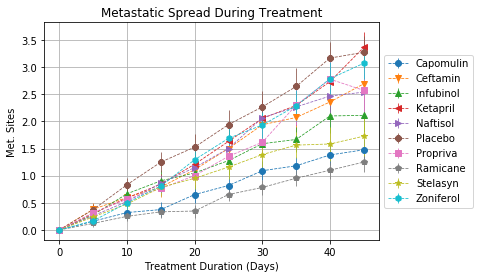

In [9]:
# Generate the Plot (with Error Bars)
xaxis = drug_time_met_sites.index
treatments = drug_time_met_sites.columns
stderr = drug_time_met_site_stderr.reset_index().pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

for i in range(len(treatments)):
    plt.errorbar(xaxis, drug_time_met_sites[treatments[i]], yerr=stderr[treatments[i]],
                 linestyle='dashed', marker=filled_markers[i], linewidth=0.8)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Save the Figure
plt.savefig('Metastatic_spread_per_treatment.png', bbox_inches='tight')
# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_time_micecount = merged_results.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
drug_time_micecount = drug_time_micecount.reset_index().rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
drug_time_micecount.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
drug_time_mice_counts = drug_time_micecount.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
drug_time_mice_counts.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


AttributeError: 'module' object has no attribute 'ylablel'

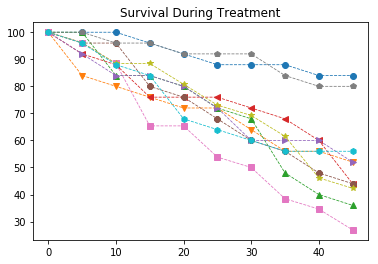

In [12]:
# Generate the Plot (Accounting for percentages)
xaxis = drug_time_mice_counts.index
treatments = drug_time_mice_counts.columns
stderr = drug_time_micecount.reset_index().pivot(index='Timepoint', columns='Drug', values='Mouse Count')
for i in range(len(treatments)):
    surv_rates = (drug_time_mice_counts[treatments[i]] / drug_time_mice_counts[treatments[i]][0]) * 100
    plt.plot(xaxis, surv_rates, linestyle='dashed', marker=filled_markers[i], linewidth=0.8)
plt.title("Survival During Treatment")
plt.ylablel("Survival Rate (%)")
plt.xlablel("Time (Days)")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))                                                                              
# Save the Figure
plt.savefig("Survival_rate_per_treatment.png", bbox_inches='tight')
# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug
tumor_percent_change = ((drug_and_time_tumor_vol.loc[drug_and_time_tumor_vol.index.isin([0,45])].pct_change()*100).iloc[1,:])
# Display the data to confirm
print(tumor_percent_change)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [1]:
# Store all Relevant Percent Changes into a Tuple
ziplist = zip(tumor_percent_change.reset_index()['Drug'], tumor_percent_change.values)
percent_changes_tupleslist = list(ziplist)

# Splice the data between passing and failing drugs
passing_drugs = []
failing_drugs = []

for drug in percent_changes_tupleslist:
    if drug[1]<0:
        passing_drugs.append(drug)
    else:
        failing_drugs.append(drug)

# Orient widths. Add labels, tick marks, etc. 
druglabels = [passing_drugs[i][0] for i in np.arange(len(passing_drugs))]
druglabels.extend([failing_drugs[i][0] for i in np.arange(len(failing_drugs))])

barwidth=1
passing_drugs_percents = [passing_drugs[i][1] for i in np.arange(len(passing_drugs))]
failing_drugs_percents = [failing_drugs[i][1] for i in np.arange(len(failing_drugs))]
pass_bars = plt.bar(np.arange(len(passing_drugs)),
                   passing_drugs_percents,
                   color='green', align='edge', width=barwidth)
fail_bars = plt.bar(np.arange(len(passing_drugs), len(percent_changes_tupleslist)),
                   failing_drugs_percents,
                   color='red', align='edge', width=barwidth)
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xticks(np.arange(len(percent_changes_tupleslist)), druglabels, rotations='vertical')

# Use functions to label the percentages of changes
def plot_percent_changes(pass_bars, fail_bars, passing_drugs_percents, failing_drugs_percents):
    pass_y = -5
    for pass_bar, passing_drugs_percent in zip(pass_bars, passing_drugs_percents):
        plt.text(pass_bar.get_x() + pass_bar.get_width()/2, pass_y, str(f"{passing_drugs_percent:.0f}%"),
                 horizontalalignment='center', verticalalignment='center')                                                              
    fail_y = 5
    for fail_bar, failing_durgs_percent in zip(fail_bars, failing_drugs_percents):
        plt.text(fail_bar.get_x() + fail_bar.get_width()/2, fail_y, str(f"{failing_drugs_percent:.0f}%"),
                 horizontalalignment='center', verticalalignment='center')
# Call functions to implement the function calls
plot_percent_changes(pass_bars, fail_bars, passing_drugs_percents, failing_drugs_percents)

# Save the Figure
plt.tight_layout()
plt.savefig("tumour_vol_change_after_45_day_treatment.png", bbox_inches='tight')

# Show the Figure
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-2e1eed83ff0a>, line 37)

![Metastatic Spread During Treatment](../Images/change.png)